In [1]:
#ABSA_plots.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'AspectbasedSentimentAnalysis.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,listing_id,review_posted_date,cleaned_review,aspects,sentiment_label
0,2595,2019-11-01,great location convenient everything very cool...,Location and Transportation,1
1,2595,2019-11-01,great location convenient everything very cool...,Accommodation Comfort and Issues,1
2,2595,2019-11-01,great location convenient everything very cool...,Accommodation Facilities and Aesthetics,1
3,2595,2019-05-01,place cute comfy host great quick communicate ...,Nearby Amenities and Food Options,1
4,2595,2019-05-01,place cute comfy host great quick communicate ...,Value and Pricing,1


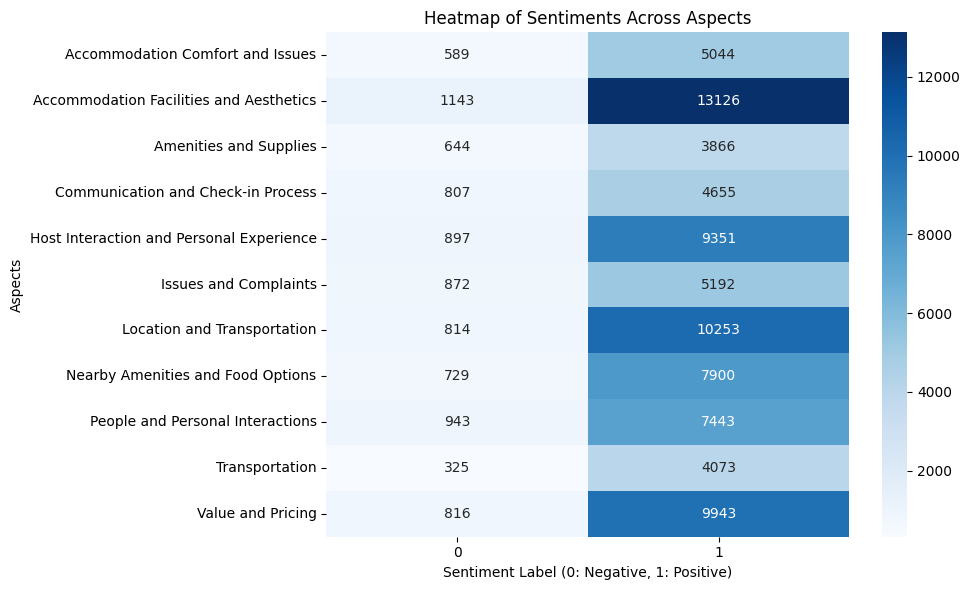

In [2]:
# Prepare data for the heatmap
heatmap_data = data.groupby(['aspects', 'sentiment_label']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap of Sentiments Across Aspects')
plt.xlabel('Sentiment Label (0: Negative, 1: Positive)')
plt.ylabel('Aspects')
plt.tight_layout()
plt.show()


### Observations from the Heatmap

   - Certain aspects, such as "Accomodation Facilities and Aesthetics" and "Location and Transportation" have predominantly positive sentiment labels.
   - The majority of sentiments across most aspects are positive (sentiment label 1), highlighting general customer satisfaction.
   - Aspects with fewer negative sentiments (label 0) indicate well-performing areas of the service.
   - Aspects with a higher concentration of negative sentiment provide actionable feedback for addressing customer concerns and enhancing service quality.


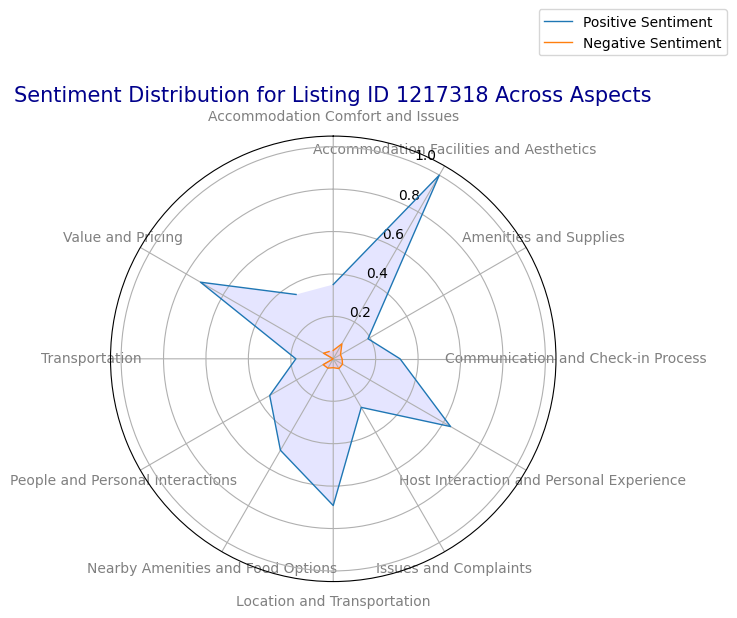

In [3]:
# Filter the data for listing ID 1217318
listing_data = data[data['listing_id'] == 1217318]

# Aggregate the sentiment counts for each aspect
radar_data = listing_data.groupby(['aspects', 'sentiment_label']).size().unstack(fill_value=0)

# Preparing data for radar chart
aspects = radar_data.index
positive_counts = radar_data[1] if 1 in radar_data.columns else [0] * len(aspects)
negative_counts = radar_data[0] if 0 in radar_data.columns else [0] * len(aspects)

# Normalize the values to fit a radar chart (optional)
max_count = max(positive_counts.max(), negative_counts.max())
positive_counts_normalized = positive_counts / max_count
negative_counts_normalized = negative_counts / max_count

# Radar chart setup
categories = list(aspects)
categories += categories[:1]  # Close the loop for radar chart

positive_values = list(positive_counts_normalized) + [positive_counts_normalized.iloc[0]]
negative_values = list(negative_counts_normalized) + [negative_counts_normalized.iloc[0]]

# Angle calculation
angles = [n / float(len(categories)) * 2 * 3.14159 for n in range(len(categories))]

# Plotting radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw one axe per aspect + add labels
ax.set_theta_offset(3.14159 / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], aspects, color='grey', size=10)

# Plot data
ax.plot(angles, positive_values, linewidth=1, linestyle='solid', label='Positive Sentiment')
ax.fill(angles, positive_values, 'b', alpha=0.1)

ax.plot(angles, negative_values, linewidth=1, linestyle='solid', label='Negative Sentiment')
ax.fill(angles, negative_values, 'r', alpha=0.1)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.3))
plt.title('Sentiment Distribution for Listing ID 1217318 Across Aspects', size=15, color='darkblue')
plt.tight_layout()
plt.show()

### Observations from the Radar Chart:

- Positive and negative sentiments vary across different aspects.
- Some aspects have a strong positive sentiment, indicated by a larger radial extension in the blue area.
- Negative sentiments, shown in red, are less dominant across most aspects but may still be significant for specific categories.

- The chart reveals aspects where positive sentiment is significantly higher, indicating customer satisfaction in those areas. Similarly, aspects with larger red areas highlight issues or dissatisfaction.

- Certain aspects show balanced positive and negative sentiments, suggesting mixed customer feedback.

- Aspects with high normalized positive values stand out, indicating areas where the listing performs exceptionally well.

- Aspects with relatively higher negative sentiment provide actionable insights for improvements.


/var/folders/mw/mxvp53qs7zs38yfnzwg2ytcm0000gn/T/ipykernel_77770/1103867964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_value_pricing['review_posted_date'] = pd.to_datetime(filtered_data_value_pricing['review_posted_date'])


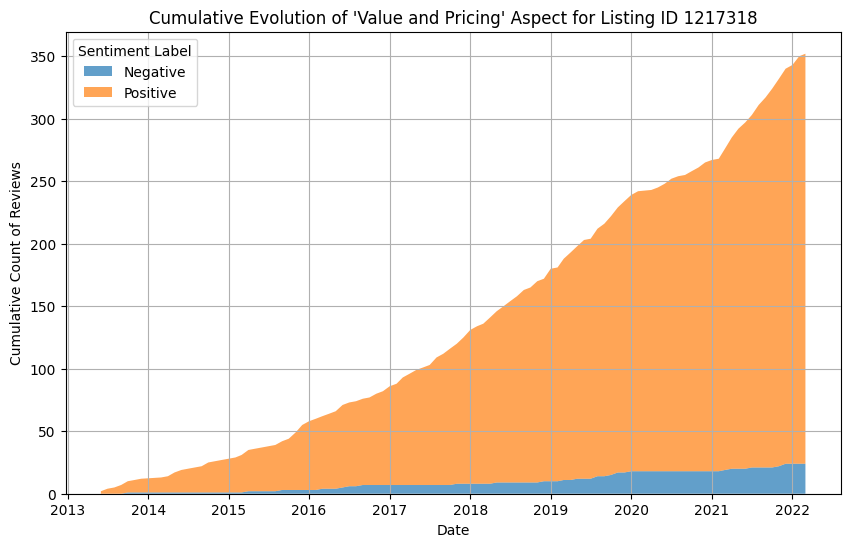

In [4]:
# Filter the dataset for the given listing_id and aspect "Value and Pricing"
filtered_data_value_pricing = data[(data['listing_id'] == 1217318) & 
                                   (data['aspects'] == 'Value and Pricing')]

# Convert the 'review_posted_date' column to datetime for proper sorting and plotting
filtered_data_value_pricing['review_posted_date'] = pd.to_datetime(filtered_data_value_pricing['review_posted_date'])

# Group data by date and sentiment to see the evolution over time
evolution_data_value_pricing = filtered_data_value_pricing.groupby(['review_posted_date', 'sentiment_label']).size().unstack(fill_value=0)

# Prepare data for stacked area plot
evolution_data_value_pricing_cumsum = evolution_data_value_pricing.cumsum()

# Plotting a stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(evolution_data_value_pricing_cumsum.index, 
              evolution_data_value_pricing_cumsum[0], 
              evolution_data_value_pricing_cumsum[1], 
              labels=['Negative', 'Positive'], alpha=0.7)
plt.title("Cumulative Evolution of 'Value and Pricing' Aspect for Listing ID 1217318")
plt.xlabel("Date")
plt.ylabel("Cumulative Count of Reviews")
plt.legend(title="Sentiment Label")
plt.grid()
plt.show()


### Observations from the Stacked Area Plot for "Value and Pricing"

   - The cumulative count of positive reviews steadily increases over time, suggesting consistent satisfaction with the "Value and Pricing" aspect for this listing.

   - Negative reviews also show some growth, but at a slower rate compared to positive reviews. This indicates that while some dissatisfaction exists, it is not as prevalent.

   - Positive sentiment remains dominant throughout the observed period, with a significantly larger cumulative count than negative sentiment.

   - The strong positive trend indicates that customers generally appreciate the value and pricing, but the presence of negative reviews highlights areas for potential improvement to enhance customer satisfaction further.
